# Multiple time series feature extraction

In [50]:
%matplotlib inline
import matplotlib.pylab as plt
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
import seaborn as sns
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

import logging

In [2]:
logging.basicConfig(level=logging.ERROR)

# Data and EDA

The dataset consists of timeseries for 7352 accelerometer readings. Each reading represents an accelerometer reading for 2.56 sec at 50hz (for a total of 128 samples per reading). Furthermore, each reading corresponds one of six activities **(walking, walking upstairs, walking downstairs, sitting, standing and laying)**

In [3]:
download_har_dataset()

In [4]:
df = load_har_dataset()

In [6]:
df.shape

(7352, 128)

In [7]:
# this means we have 7352 time series and each has 128 time points
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


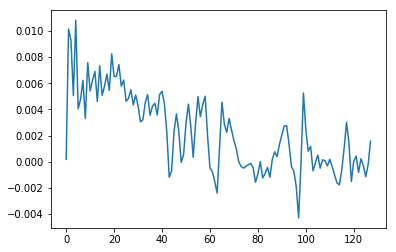

In [17]:
df.loc[0, :].plot()

# Feature Extraction

* can create own dictionary for less or more features

In [19]:
extraction_settings = ComprehensiveFCParameters()

In [22]:
N = 500

In [29]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178


In [40]:
# creating our df of group 0

master_df = pd.DataFrame({0: df[:N].values.flatten(),
                          1: np.arange(N).repeat(df.shape[1])})
master_df.head()

,0,1
0,0.000181,0
1,0.010139,0
2,0.009276,0
3,0.005066,0
4,0.010810,0


In [42]:
%%time 

X = extract_features(master_df, column_id=1, impute_function=impute, default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 20/20 [00:55<00:00,  2.77s/it]


CPU times: user 4.2 s, sys: 382 ms, total: 4.58 s
Wall time: 58 s


In [43]:
X.shape

(500, 794)

This implies 794 features were extracted

In [47]:
X.head()

variable,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,0__symmetry_looking__r_0.9,0__symmetry_looking__r_0.9500000000000001,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance,0__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,0.001766,0.182234,0.385871,0.369068,0.032822,0.008461,-0.847428,-0.000618,0.000117,0.010256,...,1.0,1.0,-2.848871e-09,-8.289268e-09,-1.655787e-08,0.0,0.0,0.0,0.000009,0.0
1,0.000506,0.167999,-0.008718,-0.004493,0.022767,0.002734,0.044690,0.000018,0.000121,0.004748,...,1.0,1.0,-5.877318e-10,-1.922393e-09,-4.718608e-10,0.0,0.0,0.0,0.000004,0.0
2,0.001106,0.231978,-0.005203,-0.016122,0.026357,0.002620,0.448916,0.000266,0.000160,0.005516,...,1.0,1.0,4.335730e-12,-3.074296e-09,-1.131423e-08,0.0,0.0,0.0,0.000008,0.0
3,0.000932,0.186693,0.040150,0.033541,0.035531,0.005630,-0.621284,-0.000424,0.000161,0.007497,...,1.0,1.0,-1.191508e-10,-3.875581e-09,-1.225939e-08,0.0,0.0,0.0,0.000007,0.0
4,0.000525,0.154255,-0.009908,-0.035693,0.028350,0.001293,0.535210,0.000203,0.000096,0.003863,...,1.0,1.0,8.025438e-11,1.392431e-09,4.529091e-09,0.0,0.0,0.0,0.000004,0.0


# Model and Evaluation

In [44]:
y = load_har_classes()[:N]
y.shape

(500,)

In [46]:
y.value_counts()

1    126
5     84
6     80
4     73
3     72
2     65
Name: 0, dtype: int64

# Without using tsfresh feature extraction

using **raw points** with no feature engineering

In [58]:
X_1 = df.loc[:N-1,:]
X_1.shape

(500, 128)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=.2)

In [60]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

           1       0.67      0.58      0.62        24
           2       0.53      0.73      0.62        11
           3       0.62      0.53      0.57        19
           4       0.29      0.31      0.30        13
           5       0.56      0.53      0.54        19
           6       0.31      0.36      0.33        14

   micro avg       0.51      0.51      0.51       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.52      0.51      0.51       100



## Tsfresh (without any feature selection)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [68]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10
           4       0.25      0.38      0.30        13
           5       0.50      0.41      0.45        22
           6       0.47      0.40      0.43        20

   micro avg       0.66      0.66      0.66       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.68      0.66      0.66       100



## Tsfresh with multiclass feature selection

For a 6 label multi classification we split the selection problem into 6 binary one-versus all classification problems. For each of them we can do a binary classification feature selection:

In [69]:
# the union will be kept rather than the intersect
relevant_features = set()

for label in y.unique():
    y_train_binary = y_train == label
    X_train_filtered = select_features(X_train, y_train_binary)
    print(f"Number of relevant features for class {label}: {X_train_filtered.shape[1]}/{X_train.shape[1]}" )
    relevant_features = relevant_features.union(set(X_train_filtered.columns))

Number of relevant features for class 5: 211/794
Number of relevant features for class 4: 205/794
Number of relevant features for class 6: 191/794
Number of relevant features for class 1: 216/794
Number of relevant features for class 3: 238/794
Number of relevant features for class 2: 152/794


In [70]:
len(relevant_features)

275

By conducting multiclass feature selection, we reduced the features from 794 to 275. We can now filter our train and test set for these 275 features

In [71]:
X_train_filtered = X_train[list(relevant_features)]
X_test_filtered = X_test[list(relevant_features)]

In [72]:
X_train_filtered.shape, X_test_filtered.shape

((400, 275), (100, 275))

In [73]:
cl = DecisionTreeClassifier()
cl.fit(X_train_filtered, y_train)
print(classification_report(y_test, cl.predict(X_test_filtered)))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10
           4       0.42      0.62      0.50        13
           5       0.57      0.55      0.56        22
           6       0.71      0.50      0.59        20

   micro avg       0.74      0.74      0.74       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.76      0.74      0.74       100



with feature selection, the precision, recall, and f1-score was improved